In [26]:
import pickle

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.cluster import KElbowVisualizer

In [20]:
# Load data (2 - '.'단위로 문장 스플릿)

# keywords set
with open("../Dataset/MA_data.pickle", "rb") as fr:
    MA_data = pickle.load(fr)

 # news summarize (sentences)
all_sentences = pd.read_csv('../Dataset/NewsSentence_2.csv')

MA_sentences = all_sentences[(all_sentences['date'] >= int(20200301)) & (all_sentences['date'] < int(20200501))]
MA_sentences = MA_sentences[MA_sentences['sentences'] != '']

MA_all = pd.concat([MA_data, MA_sentences.iloc[:, 2]], axis=1)
MA_all.drop(['keywords'], axis=1, inplace=True)
MA_all.reset_index(drop=False, inplace=True)
MA_all.shape

(7126, 6)

In [ ]:
# => '3~4월 카테고리: covid19, 검찰, 총선'으로 결정 (1-2월과 동일함)
#   선택 키워드: covid19) covid19, 검찰) 검찰, 총선) '대표'로 지정하여 추출

In [21]:
# 키워드셋에 맞는 데이터 추출 (2)

def categories_data(month_data, keyword_list):
    result = []
    for index in range(len(month_data)):
        if set(keyword_list).issubset(month_data['keywords_list'][index]):
            select_dict = {}
            select_dict['title'] = month_data['title'][index]
            select_dict['keywords'] = month_data['keywords_list'][index]
            select_dict['sentence'] = month_data['sentences'][index]

            result.append(select_dict)

    result = pd.DataFrame(result)
    return result

In [23]:
covid19_news = categories_data(MA_all, ['covid19'])
prosc_news = categories_data(MA_all, ['검찰'])
elect_news = categories_data(MA_all, ['대표'])

print('covid19 카테고리 데이터 개수: ', covid19_news.shape)
print('검찰 카테고리 데이터 개수: ', prosc_news.shape)
print('총선 카테고리 데이터 개수: ', elect_news.shape)

covid19 카테고리 데이터 개수:  (1778, 3)
검찰 카테고리 데이터 개수:  (293, 3)
총선 카테고리 데이터 개수:  (687, 3)


In [24]:
# save data (pickle)

with open("../Dataset/covid19_MA.pickle","wb") as fw:
    pickle.dump(covid19_news, fw)
    
with open("../Dataset/procs_MA.pickle","wb") as fw:
    pickle.dump(prosc_news, fw)

with open("../Dataset/elect_MA.pickle","wb") as fw:
    pickle.dump(elect_news, fw)

### 군집 개수 구하기

/home/yooso/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f35c22ba910>,
                 k=None, model=None)

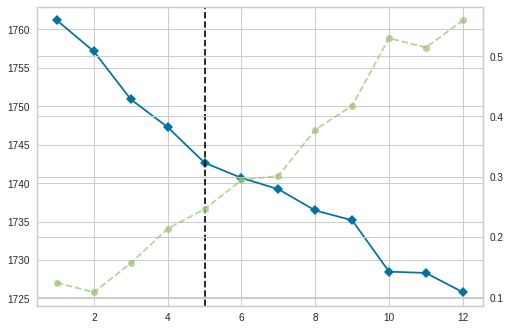

In [27]:
# covid19

covid19_news = covid19_news.dropna()
tfidf_vect = TfidfVectorizer()
fit_vec = tfidf_vect.fit_transform(covid19_news['sentence'])

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,13))
visualizer.fit(fit_vec)

In [28]:
# prosc_news
prosc_news = prosc_news.dropna()
fit_vecP = tfidf_vect.fit_transform(prosc_news['sentence'])

visualizer = KElbowVisualizer(model, k=(1,13))
visualizer.fit(fit_vecP)

/home/yooso/anaconda3/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/yooso/anaconda3/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)
/home/yooso/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f35c0086c40>,
                 k=None, model=None)

/home/yooso/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f35c22544f0>,
                 k=None, model=None)

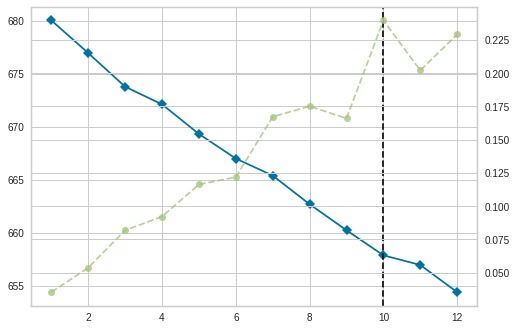

In [29]:
# elect_news

elect_news = elect_news.dropna()
fit_vecE = tfidf_vect.fit_transform(elect_news['sentence'])

visualizer = KElbowVisualizer(model, k=(1,13))
visualizer.fit(fit_vecE)